# Note: in markdown cells, It's probably easiest to leave any notes we intend to remove before submission with red text or something along those lines. That way, we can easily find them later and remove them before submitting. 

Red text can be added in markdown cells with the following syntax: \<font color='red'\>text\</font\> (replace 'text' with the text you want to be red). It'll look like this: <font color='red'>text</font>


### AST 5731 
#### Group 3 - Project 2
#### Group Members: Thomas Atkins, Tyler Barna, Tore Boybei, and Haowen Zhong

#### Contents

<font color='red'> the hyperlinks won't work when viewing the notebook on github, but they should work when viewing the notebook on jupyter notebook or when exported as an html file </font>

<font color='red'>some of these sections may not be necessary/some more may be needed</font>

 1. [Introduction](#introduction)
 2. [Data](#data)  
    2.1 [Importing Data](#importing-data)    
    2.2 [Data Visualization](#visualization)
 3. [Analysis](#analysis)   
    3.1 [Components of Statistical Model](#model)  
    3.2 [Prior Predictive Check](#prior)     
    3.3 [Posterior](#posterior)     
    3.4 [Sensitivity Analysis](#senstivity)
 4. [Results](#results)

### 1. Introduction 
<a id='introduction'></a>

### 2. Data
<a id='data'></a>

Note: Our project was run on python 3.9.13, and an environment package detailing the versions for all packages used can be found [here](https://github.com/tylerbarna/AST5731-projects/blob/main/environment.yml).

Importing packages used for project: 

<font color='red'> not all of these may end up being needed, can remove stray packages at end</font>

In [22]:
import csv
import dis
import inspect
import os
import sys
import time

import astropy
import astroquery
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as mc
import random
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

from astropy import units as u
from astropy import constants as const
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.io import ascii
from astropy.time import Time
from astropy.time import TimeDelta
from astropy.timeseries import TimeSeries
from astropy.visualization import time_support
time_support()
from astropy.visualization import quantity_support
quantity_support()

from IPython.display import display_html
from IPython.display import Image

from numpy import interp

from scipy import integrate
from scipy import linalg as la
from scipy import optimize

from scipy.stats import beta
from scipy.stats import betabinom
from scipy.stats import binom
from scipy.stats import gamma
from scipy.stats import invgamma
from scipy.stats import multivariate_normal as mvn
from scipy.stats import nbinom
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import t
from scipy.stats import uniform

from sklearn import preprocessing as pp

%matplotlib inline
plt.style.use("seaborn-colorblind")
mpl.rcParams.update({"axes.grid" : False})
plt.style.context(("seaborn-colorblind",))

## set seed for reproducibility
random.seed(5731)

#### 2.1 Importing Data
<a id='importing'></a>  

In [17]:
df = pd.read_csv('dat.txt',index_col=0,
                 dtype={'Galaxy':str, 'Type':str,
                        'N_GC':np.float64, 'N_GC_err':np.float64,
                        'Mdyn':np.float64, 'MBH':np.float64,
                        'sig_e':np.float64, 'err_sig_e':np.float64,
                        'A_V':np.float64, 'MV_T':np.float64,
                        'err_MV_T':np.float64, 'MK':np.float64,
                        'Re':np.float64, 'upMBH':np.float64,
                        'lowMBH':np.float64
                        })
df.rename({'err_sig_e':'sig_e_err', 'err_MV_T':'MV_T_err'}, axis=1, inplace=True) ## for consistency
display(df.head())
display(df.describe())

,Galaxy,Type,N_GC,N_GC_err,Mdyn,MBH,sig_e,sig_e_err,A_V,MV_T,MV_T_err,MK,Re,upMBH,lowMBH
1,MilkyWay,S,160.0,10.0,9.856,6.61,105.0,20.0,0.000,-21.30,0.30,NaN,0.70,0.04,0.04
2,WLM,Irr,1.0,0.0,NaN,NaN,NaN,NaN,0.088,-14.84,0.20,NaN,NaN,NaN,NaN
3,NGC7814,S,150.0,40.0,10.879,NaN,169.2,7.2,0.147,-20.18,0.28,-23.531,2.84,NaN,NaN
4,NGC55,S,36.0,15.0,NaN,NaN,NaN,NaN,0.036,-18.77,0.20,-20.356,2.31,NaN,NaN
5,NGC147,E,10.0,2.0,8.408,NaN,22.0,5.0,0.475,-15.46,0.30,-17.254,0.57,NaN,NaN


,N_GC,N_GC_err,Mdyn,MBH,sig_e,sig_e_err,A_V,MV_T,MV_T_err,MK,Re,upMBH,lowMBH
count,421.000000,422.000000,256.000000,65.000000,274.000000,274.000000,422.000000,421.000000,421.000000,351.000000,343.000000,65.000000,65.000000
mean,1573.788599,396.078199,10.715344,5.944154,167.854745,7.355839,0.130540,-19.130926,0.236841,17071.801422,4.260933,2.394154,0.117231
std,4181.748799,1435.582276,0.972814,3.923606,93.381261,5.604451,0.202398,2.792806,0.108609,129809.646248,6.072945,3.664595,0.130845
min,0.000000,0.000000,7.693000,0.000000,10.400000,0.700000,0.000000,-24.190000,0.200000,-27.080000,0.130000,0.030000,0.000000
25%,15.000000,6.000000,9.988500,0.000000,85.150000,3.700000,0.052000,-21.310000,0.200000,-24.664000,1.265000,0.090000,0.000000
50%,72.000000,17.000000,10.867500,7.950000,168.100000,5.800000,0.081500,-19.590000,0.200000,-23.126000,2.220000,0.160000,0.090000
75%,660.000000,187.750000,11.406000,8.720000,239.200000,9.675000,0.138500,-16.910000,0.210000,-20.412500,4.540000,6.320000,0.160000
max,32500.000000,20000.000000,12.726000,10.320000,414.000000,46.500000,2.583000,-11.170000,1.440000,999999.000000,55.000000,9.950000,0.620000


#### 2.3 Data Visualization
<a id='visualization'></a>

<Figure size 1440x720 with 0 Axes>

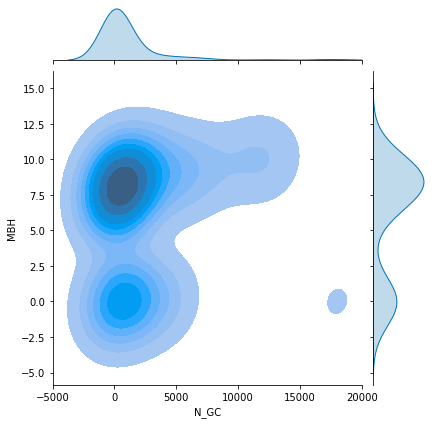

<Figure size 1440x720 with 0 Axes>

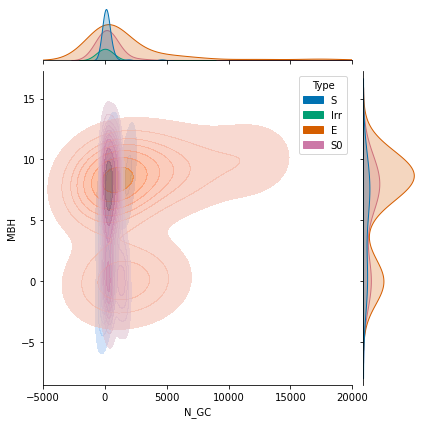

In [33]:
## joint plot of number of globular clusters and mass of black hole
plt.figure(figsize=(20, 10), facecolor='w', edgecolor='k');
plot = sns.jointplot(data=df, x='N_GC',y='MBH',
              kind='kde', fill=True);
plot.ax_marg_x.set_xlim(-5000, 20000);
plt.show();

## joint plot of number of globular clusters and mass of black hole by type
plt.figure(figsize=(20, 10), facecolor='w', edgecolor='k');
plot = sns.jointplot(data=df, x='N_GC',y='MBH', hue='Type',
              kind='kde', fill=True, alpha=0.5);
plot.ax_marg_x.set_xlim(-5000, 20000);
plt.show();

### 3. Bayesian Analysis
<a id='analysis'></a>

#### 3.1 Components of Statistical Model
<a id='model'></a>

#### 3.2 Prior Predicitive Check
<a id='prior'></a>

##### 3.3 Posterior 
<a id='posterior'></a>

#### 3.4 Sensitivity Analysis
<a id='sensitivity'></a>

### 4. Results
<a id='results'></a>